Goal of analysis script is to take csv file of acoustic startle data and analyze each AS block for each animal in the file. Two different blocks (with varrying numbers of trials). Result is excel file with a tab for each block.

In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string
import scipy

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

/Users/abbieschindler/opt/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


#### Get data

In [5]:
path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/Excel_files/Projects/sex_diff/1m/1x/SABV1xr1_AS.xlsx'

data = pd.read_excel(path)
df = pd.DataFrame(data = data)
print(df.shape)
df.head()

(2639, 17)


,Trial_Num,Trial_ID,Trial_List_Block,Chamber_ID,Channel_ID,Subject_ID,Session_ID,Group_ID,Param,Samples,Rate,V_Start,mV_Max,T_Max,mV_Avg,Run_Time,TimeStampPT
0,1,habituation,1,4,4,1383,cohort1male,NaN,NaN,200,1000,4,1265,16,112,6/25/2021 11:08:12 AM,0
1,2,habituation,1,4,4,1383,cohort1male,NaN,NaN,200,1000,8,1765,26,144,6/25/2021 11:08:25 AM,0
2,3,habituation,1,4,4,1383,cohort1male,NaN,NaN,200,1000,5,1295,15,106,6/25/2021 11:08:43 AM,0
3,4,habituation,1,4,4,1383,cohort1male,NaN,NaN,200,1000,14,975,15,83,6/25/2021 11:08:51 AM,0
4,5,habituation,1,4,4,1383,cohort1male,NaN,NaN,200,1000,6,1438,15,122,6/25/2021 11:09:10 AM,0


In [6]:
df.groupby(['Subject_ID'])['Session_ID'].value_counts()

Subject_ID  Session_ID   
67          cohort3female    91
68          cohort3female    91
69          cohort3female    91
70          cohort4female    91
71          cohort4female    91
72          cohort4female    91
73          cohort3female    91
75          cohort3female    91
76          cohort3female    91
77          cohort3female    91
78          cohort3female    91
79          cohort4female    91
80          cohort4female    91
81          cohort4female    91
1383        cohort1male      91
1384        cohort1male      91
1385        cohort1male      91
1386        cohort2male      91
1387        cohort2male      91
1388        cohort2male      91
1389        cohort1male      91
1390        cohort1male      91
1391        cohort1male      91
1392        cohort1male      91
1393        cohort1male      91
1394        cohort2male      91
1395        cohort2male      91
1396        cohort2male      91
1397        cohort2male      91
Name: Session_ID, dtype: int64

In [7]:
df['Session_ID'].value_counts()

cohort3female    728
cohort1male      728
cohort2male      637
cohort4female    546
Name: Session_ID, dtype: int64

In [8]:
df[df['Subject_ID'].isna()]

,Trial_Num,Trial_ID,Trial_List_Block,Chamber_ID,Channel_ID,Subject_ID,Session_ID,Group_ID,Param,Samples,Rate,V_Start,mV_Max,T_Max,mV_Avg,Run_Time,TimeStampPT


In [ ]:
sub_exclude = [1402, 1386, 1387, 1388]
df=df[~df['Subject_ID'].isin(sub_exclude)]
df=df[df['Session_ID']!='1402runtwice']
df.shape

#### Get meta data and combine

In [9]:
path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Analysis/excel_files/sex_diff/meta.xlsx'

meta = pd.read_excel(path)
meta = pd.DataFrame(data = meta)
print(meta.shape)
meta.head()

(75, 9)


,Round_main,Group,Animal_#,Treatment,Number,file_name,Cage_#,Notes,Sex
0,SABV_behav_r1,3,1,sham,3,NaN,SA236,NaN,f
1,SABV_behav_r1,3,2,sham,3,NaN,SA236,NaN,f
2,SABV_behav_r1,3,3,sham,3,NaN,SA236,NaN,f
3,SABV_behav_r1,3,4,sham,3,NaN,SA238,NaN,f
4,SABV_behav_r1,3,5,sham,3,NaN,SA238,NaN,f


In [10]:
df_meta = meta.merge(df, left_on='Animal_#', right_on='Subject_ID')
print(df_meta.shape)
df_meta.head()

(2639, 26)


,Round_main,Group,Animal_#,Treatment,Number,file_name,Cage_#,Notes,Sex,Trial_Num,Trial_ID,Trial_List_Block,Chamber_ID,Channel_ID,Subject_ID,Session_ID,Group_ID,Param,Samples,Rate,V_Start,mV_Max,T_Max,mV_Avg,Run_Time,TimeStampPT
0,SABV_behav_r2,1,67,sham,1,NaN,SA390,NaN,f,1,habituation,1,3,3,67,cohort3female,NaN,NaN,200,1000,3,1370,16,139,6/25/2021 12:48:05 PM,0
1,SABV_behav_r2,1,67,sham,1,NaN,SA390,NaN,f,2,habituation,1,3,3,67,cohort3female,NaN,NaN,200,1000,6,880,16,91,6/25/2021 12:48:19 PM,0
2,SABV_behav_r2,1,67,sham,1,NaN,SA390,NaN,f,3,habituation,1,3,3,67,cohort3female,NaN,NaN,200,1000,8,892,16,91,6/25/2021 12:48:37 PM,0
3,SABV_behav_r2,1,67,sham,1,NaN,SA390,NaN,f,4,habituation,1,3,3,67,cohort3female,NaN,NaN,200,1000,7,1013,16,110,6/25/2021 12:48:44 PM,0
4,SABV_behav_r2,1,67,sham,1,NaN,SA390,NaN,f,5,habituation,1,3,3,67,cohort3female,NaN,NaN,200,1000,7,1053,16,125,6/25/2021 12:49:04 PM,0


#### Split by trial type

In [11]:
df_hab = df_meta[df_meta['Trial_ID']=='habituation']
print(df_hab.shape)
df_chill = df_meta[df_meta['Trial_ID']=='chill']
print(df_chill.shape)
df_PPI = df_meta[df_meta['Trial_List_Block']==3]
print(df_PPI.shape)

(1450, 26)
(29, 26)
(1160, 26)


#### 2 min break

In [12]:
df_chill=df_chill.sort_values('Subject_ID')
df_chill.head()

,Round_main,Group,Animal_#,Treatment,Number,file_name,Cage_#,Notes,Sex,Trial_Num,Trial_ID,Trial_List_Block,Chamber_ID,Channel_ID,Subject_ID,Session_ID,Group_ID,Param,Samples,Rate,V_Start,mV_Max,T_Max,mV_Avg,Run_Time,TimeStampPT
50,SABV_behav_r2,1,67,sham,1,NaN,SA390,NaN,f,51,chill,2,3,3,67,cohort3female,NaN,NaN,200,1000,7,60,127,11,6/25/2021 1:03:36 PM,0
141,SABV_behav_r2,1,68,sham,1,NaN,SA390,NaN,f,51,chill,2,4,4,68,cohort3female,NaN,NaN,200,1000,33,53,124,17,6/25/2021 1:03:36 PM,0
232,SABV_behav_r2,1,69,sham,1,NaN,SA390,NaN,f,51,chill,2,5,5,69,cohort3female,NaN,NaN,200,1000,2,21,55,7,6/25/2021 1:03:36 PM,0
323,SABV_behav_r2,1,70,sham,1,NaN,SA391,NaN,f,51,chill,2,1,1,70,cohort4female,NaN,NaN,200,1000,3,84,196,20,6/25/2021 1:48:14 PM,0
414,SABV_behav_r2,1,71,sham,1,NaN,SA391,NaN,f,51,chill,2,2,2,71,cohort4female,NaN,NaN,200,1000,1,22,173,4,6/25/2021 1:48:14 PM,0


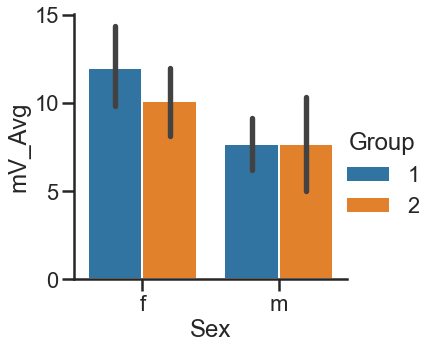

In [13]:
g = sns.catplot(x='Sex', y='mV_Avg', data=df_chill, kind='bar', height=5, aspect=1, ci=68, hue='Group')
plt.show()

#### Habituation

In [14]:
df_hab['Trial_Bin'] = pd.cut(df_hab['Trial_Num'], 5, labels=False)

In [15]:
df_hab_final = df_hab.groupby(['Sex', 'Group', 'Subject_ID', 'Trial_Bin']).mean().reset_index()
df_hab_final.head()

,Sex,Group,Subject_ID,Trial_Bin,Animal_#,Number,file_name,Trial_Num,Trial_List_Block,Chamber_ID,Channel_ID,Group_ID,Param,Samples,Rate,V_Start,mV_Max,T_Max,mV_Avg,TimeStampPT
0,f,1,67,0,67.0,1.0,NaN,5.5,1.0,3.0,3.0,NaN,NaN,200.0,1000.0,6.2,1063.0,20.1,110.0,0.0
1,f,1,67,1,67.0,1.0,NaN,15.5,1.0,3.0,3.0,NaN,NaN,200.0,1000.0,10.8,1234.1,28.2,108.9,0.0
2,f,1,67,2,67.0,1.0,NaN,25.5,1.0,3.0,3.0,NaN,NaN,200.0,1000.0,8.4,980.0,21.8,98.8,0.0
3,f,1,67,3,67.0,1.0,NaN,35.5,1.0,3.0,3.0,NaN,NaN,200.0,1000.0,5.4,976.8,17.4,109.8,0.0
4,f,1,67,4,67.0,1.0,NaN,45.5,1.0,3.0,3.0,NaN,NaN,200.0,1000.0,15.4,564.7,29.9,84.4,0.0


In [16]:
df_hab_final_unstack = df_hab_final.set_index(['Sex', 'Group', 'Subject_ID', 'Trial_Bin']).unstack(-1).reset_index().sort_values(['Subject_ID'])
df_hab_final_unstack.head()

Sex Group Subject_ID Animal_#                         Number                     file_name                 Trial_Num                         Trial_List_Block                     Chamber_ID                     Channel_ID                     Group_ID                 Param                 Samples                                Rate                                 V_Start                          mV_Max                                 T_Max                         mV_Avg                             TimeStampPT                    
Trial_Bin                             0     1     2     3     4      0    1    2    3    4         0   1   2   3   4         0     1     2     3     4                0    1    2    3    4          0    1    2    3    4          0    1    2    3    4        0   1   2   3   4     0   1   2   3   4       0      1      2      3      4       0       1       2       3       4       0     1     2     3     4       0       1       2       3       4     0     1     2     3     4      0      1      2      3      4           0    1    2    3    4
0          f   1     67         67.0     67.0  67.0  67.0  67.0  1.0    1.0  1.0  1.0  1.0 NaN       NaN NaN NaN NaN  5.5       15.5  25.5  35.5  45.5  1.0              1.0  1.0  1.0  1.0  3.0        3.0  3.0  3.0  3.0  3.0        3.0  3.0  3.0  3.0 NaN      NaN NaN NaN NaN NaN   NaN NaN NaN NaN  200.0   200.0  200.0  200.0  200.0  1000.0  1000.0  1000.0  1000.0  1000.0  6.2     10.8  8.4   5.4   15.4  1063.0  1234.1  980.0   976.8   564.7   20.1  28.2  21.8  17.4  29.9  110.0  108.9  98.8   109.8  84.4   0.0         0.0  0.0  0.0  0.0
1          f   1     68         68.0     68.0  68.0  68.0  68.0  1.0    1.0  1.0  1.0  1.0 NaN       NaN NaN NaN NaN  5.5       15.5  25.5  35.5  45.5  1.0              1.0  1.0  1.0  1.0  4.0        4.0  4.0  4.0  4.0  4.0        4.0  4.0  4.0  4.0 NaN      NaN NaN NaN NaN NaN   NaN NaN NaN NaN  200.0   200.0  200.0  200.0  200.0  1000.0  1000.0  1000.0  1000.0  1000.0  6.2     4.4   5.6   18.1  2.8   1340.4  1587.4  1239.0  1141.6  1180.6  18.5  24.2  20.3  24.8  15.9  162.3  138.8  126.2  105.6  110.0  0.0         0.0  0.0  0.0  0.0
2          f   1     69         69.0     69.0  69.0  69.0  69.0  1.0    1.0  1.0  1.0  1.0 NaN       NaN NaN NaN NaN  5.5       15.5  25.5  35.5  45.5  1.0              1.0  1.0  1.0  1.0  5.0        5.0  5.0  5.0  5.0  5.0        5.0  5.0  5.0  5.0 NaN      NaN NaN NaN NaN NaN   NaN NaN NaN NaN  200.0   200.0  200.0  200.0  200.0  1000.0  1000.0  1000.0  1000.0  1000.0  11.2    5.7   6.7   14.9  13.2  745.2   810.0   633.8   433.0   232.5   17.0  16.0  16.8  19.7  32.6  72.3   76.6   60.8   45.6   30.4   0.0         0.0  0.0  0.0  0.0
3          f   1     70         70.0     70.0  70.0  70.0  70.0  1.0    1.0  1.0  1.0  1.0 NaN       NaN NaN NaN NaN  5.5       15.5  25.5  35.5  45.5  1.0              1.0  1.0  1.0  1.0  1.0        1.0  1.0  1.0  1.0  1.0        1.0  1.0  1.0  1.0 NaN      NaN NaN NaN NaN NaN   NaN NaN NaN NaN  200.0   200.0  200.0  200.0  200.0  1000.0  1000.0  1000.0  1000.0  1000.0  9.5     5.6   7.4   18.3  18.6  1059.8  957.9   754.6   865.6   1104.1  17.1  20.3  17.4  20.8  16.6  124.1  113.9  94.7   95.2   122.6  0.0         0.0  0.0  0.0  0.0
4          f   1     71         71.0     71.0  71.0  71.0  71.0  1.0    1.0  1.0  1.0  1.0 NaN       NaN NaN NaN NaN  5.5       15.5  25.5  35.5  45.5  1.0              1.0  1.0  1.0  1.0  2.0        2.0  2.0  2.0  2.0  2.0        2.0  2.0  2.0  2.0 NaN      NaN NaN NaN NaN NaN   NaN NaN NaN NaN  200.0   200.0  200.0  200.0  200.0  1000.0  1000.0  1000.0  1000.0  1000.0  11.2    12.5  17.5  12.4  12.2  1089.8  1188.7  904.0   1475.9  1037.8  21.1  15.0  16.7  16.6  22.8  112.9  121.4  96.4   151.8  113.4  0.0         0.0  0.0  0.0  0.0

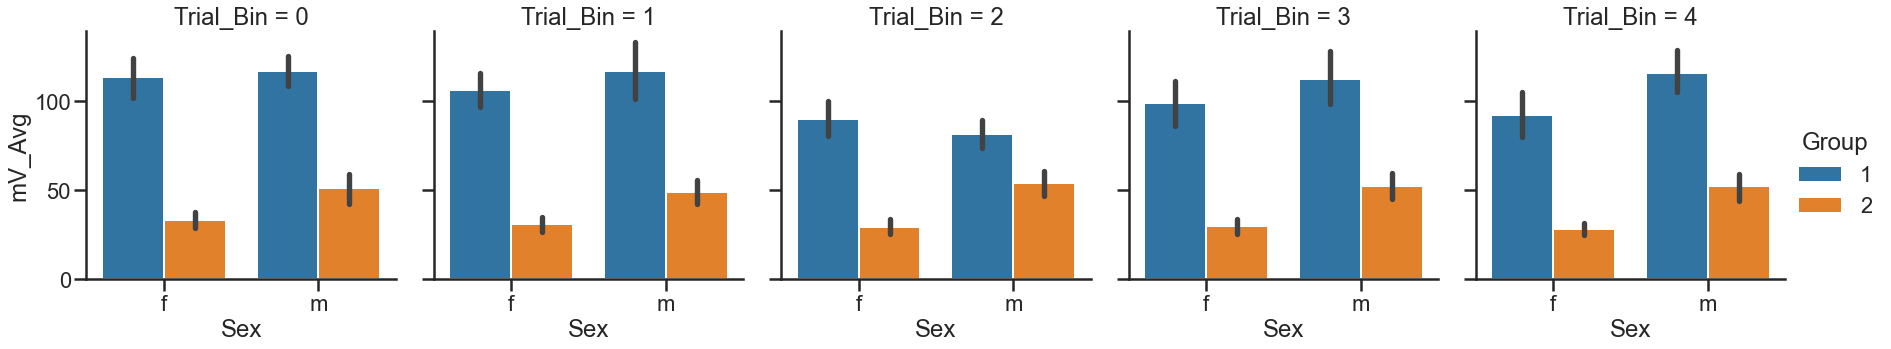

In [17]:
g = sns.catplot(x='Sex', y='mV_Avg', data=df_hab_final, kind='bar', height=5, aspect=1, ci=68, hue='Group', col='Trial_Bin')
plt.show()

In [18]:
df_hab_final_ratio = (df_hab_final[df_hab_final['Trial_Bin']==4].set_index(['Sex', 'Group', 'Subject_ID']) / df_hab_final[df_hab_final['Trial_Bin']==0].set_index(['Sex', 'Group', 'Subject_ID'])).reset_index()
df_hab_final_ratio.head()

,Sex,Group,Subject_ID,Trial_Bin,Animal_#,Number,file_name,Trial_Num,Trial_List_Block,Chamber_ID,Channel_ID,Group_ID,Param,Samples,Rate,V_Start,mV_Max,T_Max,mV_Avg,TimeStampPT
0,f,1,67,inf,1.0,1.0,NaN,8.272727,1.0,1.0,1.0,NaN,NaN,1.0,1.0,2.483871,0.531232,1.487562,0.767273,NaN
1,f,1,68,inf,1.0,1.0,NaN,8.272727,1.0,1.0,1.0,NaN,NaN,1.0,1.0,0.451613,0.880782,0.859459,0.677757,NaN
2,f,1,69,inf,1.0,1.0,NaN,8.272727,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.178571,0.311997,1.917647,0.420470,NaN
3,f,1,70,inf,1.0,1.0,NaN,8.272727,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.957895,1.041800,0.970760,0.987913,NaN
4,f,1,71,inf,1.0,1.0,NaN,8.272727,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.089286,0.952285,1.080569,1.004429,NaN


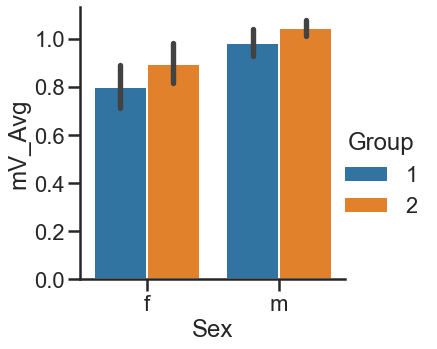

In [19]:
g = sns.catplot(x='Sex', y='mV_Avg', data=df_hab_final_ratio, kind='bar', height=5, aspect=1, ci=68, hue='Group')
plt.show()

#### PPI

In [20]:
PPI_map = {'2ms_PPI':2, 
           '10ms_PPI':10, 
           '20ms_PPI':20, 
           '50ms_PPI':50,
           '100ms_PPI':100, 
           '200ms_PPI':200, 
           '500ms_PPI':500,
           '1000ms_PPI':1000,}

df_PPI['prepulse_pulse_delay'] = df_PPI['Trial_ID'].map(PPI_map)
df_PPI.head()

,Round_main,Group,Animal_#,Treatment,Number,file_name,Cage_#,Notes,Sex,Trial_Num,Trial_ID,Trial_List_Block,Chamber_ID,Channel_ID,Subject_ID,Session_ID,Group_ID,Param,Samples,Rate,V_Start,mV_Max,T_Max,mV_Avg,Run_Time,TimeStampPT,prepulse_pulse_delay
51,SABV_behav_r2,1,67,sham,1,NaN,SA390,NaN,f,52,2ms_PPI,3,3,3,67,cohort3female,NaN,NaN,200,1000,13,494,18,65,6/25/2021 1:03:59 PM,0,2
52,SABV_behav_r2,1,67,sham,1,NaN,SA390,NaN,f,53,20ms_PPI,3,3,3,67,cohort3female,NaN,NaN,200,1000,82,359,17,45,6/25/2021 1:04:17 PM,0,20
53,SABV_behav_r2,1,67,sham,1,NaN,SA390,NaN,f,54,100ms_PPI,3,3,3,67,cohort3female,NaN,NaN,200,1000,5,458,16,51,6/25/2021 1:04:29 PM,0,100
54,SABV_behav_r2,1,67,sham,1,NaN,SA390,NaN,f,55,500ms_PPI,3,3,3,67,cohort3female,NaN,NaN,200,1000,3,375,16,44,6/25/2021 1:04:51 PM,0,500
55,SABV_behav_r2,1,67,sham,1,NaN,SA390,NaN,f,56,200ms_PPI,3,3,3,67,cohort3female,NaN,NaN,200,1000,1,305,16,36,6/25/2021 1:05:08 PM,0,200


In [21]:
df_PPI_gb = df_PPI.groupby(['Sex', 'Group', 'Subject_ID', 'prepulse_pulse_delay']).mean().reset_index()
df_PPI_unstack = df_PPI_gb.set_index(['Sex', 'Group', 'Subject_ID', 'prepulse_pulse_delay']).unstack(-1).reset_index().sort_values(['Subject_ID'])
df_PPI_unstack.head()

Sex Group Subject_ID Animal_#                                           Number                                    file_name                              Trial_Num                                           Trial_List_Block                                    Chamber_ID                                    Channel_ID                                    Group_ID                              Param                              Samples                                                     Rate                                                         V_Start                                           mV_Max                                                  T_Max                                           mV_Avg                                           TimeStampPT                                   
prepulse_pulse_delay                             2    10    20    50   100   200   500  1000      2   10   20   50  100  200  500 1000         2  10  20  50 100 200 500 1000         2    10    20    50   100   200   500  1000                2   10   20   50  100  200  500 1000          2   10   20   50  100  200  500 1000          2   10   20   50  100  200  500 1000        2  10  20  50 100 200 500 1000     2  10  20  50 100 200 500 1000       2     10     20     50    100    200    500   1000       2      10      20      50     100     200     500    1000       2    10    20    50   100   200   500  1000      2     10     20     50    100    200    500   1000     2    10    20    50   100   200   500  1000      2    10    20    50   100   200   500  1000           2   10   20   50  100  200  500 1000
0                     f   1     67         67.0     67.0  67.0  67.0  67.0  67.0  67.0  67.0  1.0    1.0  1.0  1.0  1.0  1.0  1.0  1.0 NaN       NaN NaN NaN NaN NaN NaN NaN   70.8      71.8  70.6  71.8  70.6  71.6  73.0  71.8  3.0              3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0        3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0        3.0  3.0  3.0  3.0  3.0  3.0  3.0 NaN      NaN NaN NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN NaN NaN   200.0   200.0  200.0  200.0  200.0  200.0  200.0  200.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  26.0    54.8  40.4  9.4   6.0   3.6   3.4   10.0  286.8  289.2  277.8  281.2  242.2  441.0  318.4  580.8  19.6  21.8  26.0  23.8  23.6  18.8  25.6  21.2  38.0   42.4  41.8  31.2  33.8  53.0  41.4  72.2  0.0         0.0  0.0  0.0  0.0  0.0  0.0  0.0
1                     f   1     68         68.0     68.0  68.0  68.0  68.0  68.0  68.0  68.0  1.0    1.0  1.0  1.0  1.0  1.0  1.0  1.0 NaN       NaN NaN NaN NaN NaN NaN NaN   70.8      71.8  70.6  71.8  70.6  71.6  73.0  71.8  3.0              3.0  3.0  3.0  3.0  3.0  3.0  3.0  4.0        4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0        4.0  4.0  4.0  4.0  4.0  4.0  4.0 NaN      NaN NaN NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN NaN NaN   200.0   200.0  200.0  200.0  200.0  200.0  200.0  200.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  30.4    37.6  22.8  20.6  4.4   3.0   12.6  15.2  652.0  450.6  500.0  698.2  727.4  703.4  814.4  912.4  18.4  17.4  16.6  16.8  18.0  15.8  18.4  18.2  75.0   52.0  57.6  76.6  71.6  71.4  90.2  97.2  0.0         0.0  0.0  0.0  0.0  0.0  0.0  0.0
2                     f   1     69         69.0     69.0  69.0  69.0  69.0  69.0  69.0  69.0  1.0    1.0  1.0  1.0  1.0  1.0  1.0  1.0 NaN       NaN NaN NaN NaN NaN NaN NaN   70.8      71.8  70.6  71.8  70.6  71.6  73.0  71.8  3.0              3.0  3.0  3.0  3.0  3.0  3.0  3.0  5.0        5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0        5.0  5.0  5.0  5.0  5.0  5.0  5.0 NaN      NaN NaN NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN NaN NaN   200.0   200.0  200.0  200.0  200.0  200.0  200.0  200.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  28.6    6.2   34.8  20.2  6.4   18.2  8.4   7.0   149.8  150.2  147.4  192.8  245.8  292.2  346.8  361.4  23.6  12.6  16.8  19.2  24.4  16.0  21.8  17.6  22.6   21.2  21.2  24.0  27.0  26.8  35.0  38.

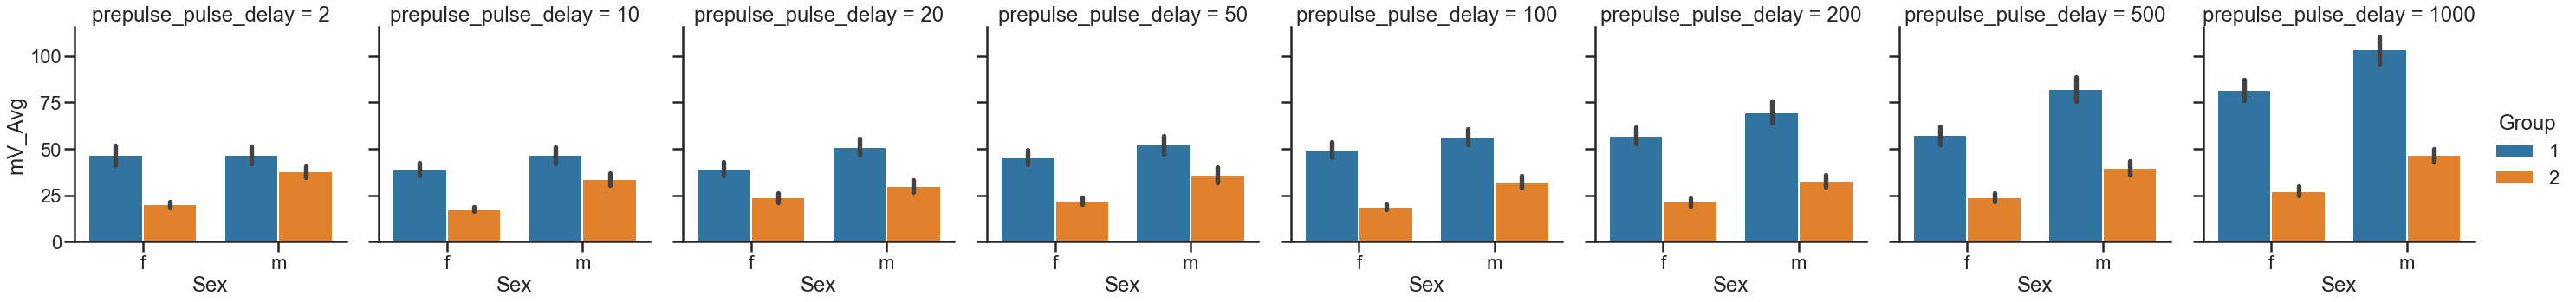

In [22]:
g = sns.catplot(x='Sex', y='mV_Avg', data=df_PPI, kind='bar', height=5, aspect=1, ci=68, hue='Group', col='prepulse_pulse_delay')
plt.show()

use mean of first 5 startle trials as pulse only

In [23]:
df_hab_PPI = df_hab
df_hab_PPI['Trial_Bin'] = pd.cut(df_hab_PPI['Trial_Num'], 10, labels=False)

df_hab_PPI_gb = df_hab_PPI.groupby(['Sex', 'Group', 'Subject_ID', 'Trial_Bin']).mean().reset_index()
df_hab_PPI_gb_5t = df_hab_PPI_gb[df_hab_PPI_gb['Trial_Bin']==0]
print(df_hab_PPI_gb_5t.shape)
df_hab_PPI_gb_5t.head()

(29, 20)


,Sex,Group,Subject_ID,Trial_Bin,Animal_#,Number,file_name,Trial_Num,Trial_List_Block,Chamber_ID,Channel_ID,Group_ID,Param,Samples,Rate,V_Start,mV_Max,T_Max,mV_Avg,TimeStampPT
0,f,1,67,0,67.0,1.0,NaN,3.0,1.0,3.0,3.0,NaN,NaN,200.0,1000.0,6.2,1041.6,16.0,111.2,0.0
10,f,1,68,0,68.0,1.0,NaN,3.0,1.0,4.0,4.0,NaN,NaN,200.0,1000.0,5.6,1326.8,18.0,164.8,0.0
20,f,1,69,0,69.0,1.0,NaN,3.0,1.0,5.0,5.0,NaN,NaN,200.0,1000.0,12.8,770.6,17.6,69.2,0.0
30,f,1,70,0,70.0,1.0,NaN,3.0,1.0,1.0,1.0,NaN,NaN,200.0,1000.0,11.4,1103.4,15.4,124.8,0.0
40,f,1,71,0,71.0,1.0,NaN,3.0,1.0,2.0,2.0,NaN,NaN,200.0,1000.0,18.0,1004.0,26.0,104.6,0.0


In [24]:
df_PPI_ratio = (df_PPI.set_index(['Sex', 'Group', 'Subject_ID', 'prepulse_pulse_delay']) / df_hab_PPI_gb_5t.set_index(['Sex', 'Group', 'Subject_ID'])).reset_index()
df_PPI_ratio.head()

,Sex,Group,Subject_ID,prepulse_pulse_delay,Animal_#,Cage_#,Chamber_ID,Channel_ID,Group_ID,Notes,Number,Param,Rate,Round_main,Run_Time,Samples,Session_ID,T_Max,TimeStampPT,Treatment,Trial_Bin,Trial_ID,Trial_List_Block,Trial_Num,V_Start,file_name,mV_Avg,mV_Max
0,f,1,67,2,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.1250,NaN,NaN,NaN,NaN,3.0,17.333333,2.096774,NaN,0.584532,0.474270
1,f,1,67,20,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0625,NaN,NaN,NaN,NaN,3.0,17.666667,13.225806,NaN,0.404676,0.344662
2,f,1,67,100,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0000,NaN,NaN,NaN,NaN,3.0,18.000000,0.806452,NaN,0.458633,0.439708
3,f,1,67,500,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0000,NaN,NaN,NaN,NaN,3.0,18.333333,0.483871,NaN,0.395683,0.360023
4,f,1,67,200,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0000,NaN,NaN,NaN,NaN,3.0,18.666667,0.161290,NaN,0.323741,0.292819


In [25]:
df_PPI_ratio_gb = df_PPI_ratio.groupby(['Sex', 'Group', 'Subject_ID', 'prepulse_pulse_delay']).mean().reset_index()
df_PPI_ratio_gb_unstack = df_PPI_ratio_gb.set_index(['Sex', 'Group', 'Subject_ID', 'prepulse_pulse_delay']).unstack(-1).reset_index().sort_values(['Subject_ID'])
df_PPI_ratio_gb_unstack.head()

Sex Group Subject_ID Animal_#                                    Cage_#                              Chamber_ID                                    Channel_ID                                    Group_ID                              Notes                              Number                                    Param                              Rate                                    Round_main                              Run_Time                              Samples                                    Session_ID                                  T_Max                                                                       TimeStampPT                              Treatment                              Trial_Bin                              Trial_ID                              Trial_List_Block                                    Trial_Num                                                                                V_Start                                                                       file_name                                 mV_Avg                                                                          mV_Max                                                                      
prepulse_pulse_delay                             2   10   20   50  100  200  500 1000      2  10  20  50 100 200 500 1000          2   10   20   50  100  200  500 1000          2   10   20   50  100  200  500 1000        2  10  20  50 100 200 500 1000     2  10  20  50 100 200 500 1000      2   10   20   50  100  200  500 1000     2  10  20  50 100 200 500 1000    2   10   20   50  100  200  500 1000          2  10  20  50 100 200 500 1000        2  10  20  50 100 200 500 1000       2   10   20   50  100  200  500 1000          2  10  20  50 100 200 500 1000         2        10        20        50       100       200       500      1000           2  10  20  50 100 200 500 1000         2  10  20  50 100 200 500 1000         2  10  20  50 100 200 500 1000        2  10  20  50 100 200 500 1000                2   10   20   50  100  200  500 1000         2         10         20         50        100        200        500       1000         2        10        20        50       100       200       500      1000         2  10  20  50 100 200 500 1000         2        10        20        50       100       200       500      1000         2        10        20        50       100       200       500      1000
0                     f   1     67         1.0      1.0  1.0  1.0  1.0  1.0  1.0  1.0 NaN    NaN NaN NaN NaN NaN NaN NaN   1.0        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0        1.0  1.0  1.0  1.0  1.0  1.0  1.0 NaN      NaN NaN NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN NaN NaN   1.0    1.0  1.0  1.0  1.0  1.0  1.0  1.0 NaN   NaN NaN NaN NaN NaN NaN NaN   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0 NaN        NaN NaN NaN NaN NaN NaN NaN  NaN      NaN NaN NaN NaN NaN NaN NaN   1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0 NaN        NaN NaN NaN NaN NaN NaN NaN   1.225000  1.362500  1.625000  1.487500  1.475000  1.175000  1.600000  1.325000 NaN         NaN NaN NaN NaN NaN NaN NaN  NaN       NaN NaN NaN NaN NaN NaN NaN  NaN       NaN NaN NaN NaN NaN NaN NaN  NaN      NaN NaN NaN NaN NaN NaN NaN   3.0              3.0  3.0  3.0  3.0  3.0  3.0  3.0  23.6      23.933333  23.533333  23.933333  23.533333  23.866667  24.333333  23.933333  4.193548  8.838710  6.516129  1.516129  0.967742  0.580645  0.548387  1.612903 NaN       NaN NaN NaN NaN NaN NaN NaN   0.341727  0.381295  0.375899  0.280576  0.303957  0.476619  0.372302  0.649281  0.275346  0.277650  0.266705  0.269969  0.232527  0.423387  0.305684  0.557604
1                     f   1     68         1.0      1.0  1.0  1.0  1.0  1.0  1.0  1.0 NaN    NaN NaN NaN NaN NaN NaN NaN   1.0        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0        1.0  1.0  1.0  1.0  1.0  1.0  1.0 NaN      NaN NaN NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN NaN NaN   1.0    1.0  1.0  1.0  1.0  1.0  1.0  1.0 NaN   NaN NaN NaN NaN NaN NaN Na

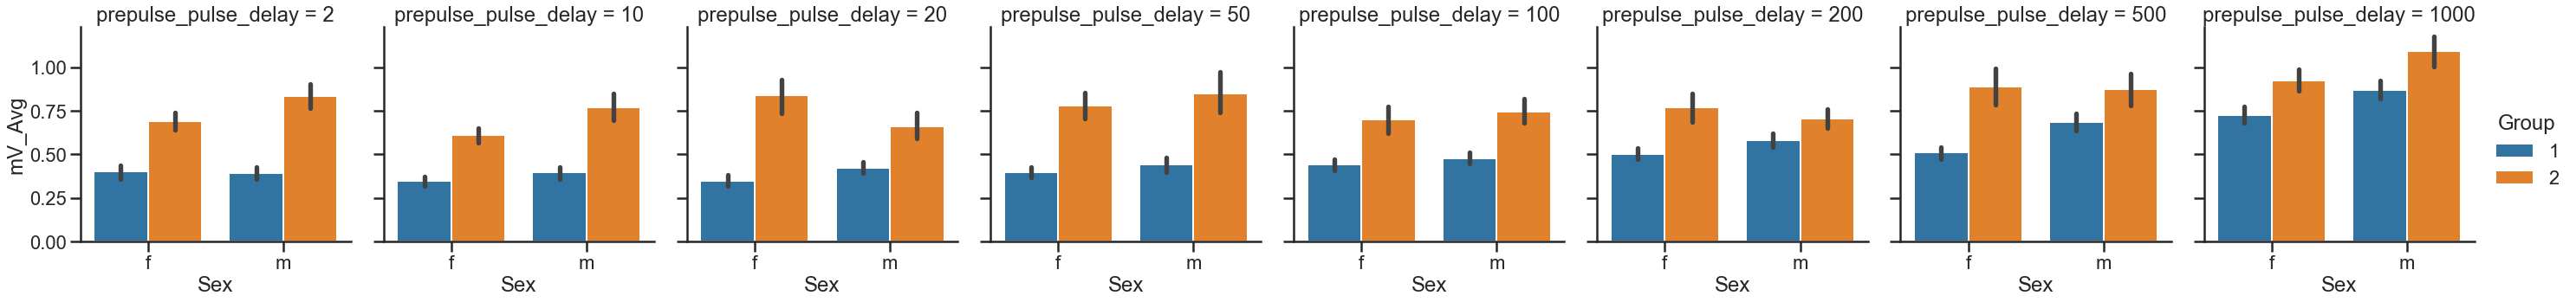

In [26]:
g = sns.catplot(x='Sex', y='mV_Avg', data=df_PPI_ratio, kind='bar', height=5, aspect=1, ci=68, hue='Group', col='prepulse_pulse_delay')
plt.show()

#### save csvs

In [27]:
df_chill.to_csv('df_chill.csv')
df_hab_final_unstack.to_csv('df_hab_final_unstack.csv')
df_PPI_unstack.to_csv('df_PPI_unstack.csv')
df_PPI_ratio_gb_unstack.to_csv('df_PPI_ratio_gb_unstack.csv')